In [75]:
## Import necessary libraries
# import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
## Import the dataset
dataset = pd.read_csv("water_potability.csv")
dataset.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [77]:
## Data Preprocessing (Cleansing)
# Check for missing values (before)
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [78]:
# Print list of columns with missing values
missing_cols = dataset.columns[dataset.isnull().any()].tolist()

# Update missing cols name
for i in range(len(missing_cols)):
    dataset.columns = dataset.columns.str.replace(missing_cols[i], missing_cols[i] + "_11385")

# Fill each columns missing values with its median
for i in range(len(missing_cols)):
    dataset[missing_cols[i] + "_11385"].fillna(dataset[missing_cols[i] + "_11385"].median(), inplace=True)

# Check for missing values (after)
dataset.isnull().sum()

ph_11385                 0
Hardness                 0
Solids                   0
Chloramines              0
Sulfate_11385            0
Conductivity             0
Organic_carbon           0
Trihalomethanes_11385    0
Turbidity                0
Potability               0
dtype: int64

In [79]:
## Data Preprocessing (Encoding)
# Check for categorical data
dataset.dtypes

ph_11385                 float64
Hardness                 float64
Solids                   float64
Chloramines              float64
Sulfate_11385            float64
Conductivity             float64
Organic_carbon           float64
Trihalomethanes_11385    float64
Turbidity                float64
Potability                 int64
dtype: object

In [80]:
## Data Preprocessing (Scaling)
# Check for outliers
dataset.describe()

,ph_11385,Hardness,Solids,Chloramines,Sulfate_11385,Conductivity,Organic_carbon,Trihalomethanes_11385,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [81]:
## Data Preprocessing (Splitting)
# Split the dataset into the Training set (70%) and Test set (30%)
from sklearn.model_selection import train_test_split

# Set model to predict the potability
X = dataset.drop("Potability", axis=1)
y = dataset["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
## Training ML with KNN with parameter n_neighbors=5,weights="uniform"
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
## Training ML with Decision Tree with parameter max_depth=4, random_state=42
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [84]:
## Predicting the Test set results
knn_prediction = knn.predict(X_test)
dt_prediction = dt.predict(X_test)

In [85]:
## Evaluating the Model Performance
from sklearn.metrics import classification_report

# KNN
print("[ KNN Model Performance]")
print(classification_report(y_test, knn_prediction))

[ KNN Model Performance]
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       617
           1       0.37      0.31      0.34       366

    accuracy                           0.55       983
   macro avg       0.50      0.50      0.50       983
weighted avg       0.53      0.55      0.54       983



In [86]:
# Decision Tree
print("[ Decision Tree Model Performance]")
print(classification_report(y_test, dt_prediction))

[ Decision Tree Model Performance]
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       617
           1       0.57      0.24      0.34       366

    accuracy                           0.65       983
   macro avg       0.62      0.57      0.55       983
weighted avg       0.63      0.65      0.60       983



<Axes: xlabel='ph_11385', ylabel='Potability'>

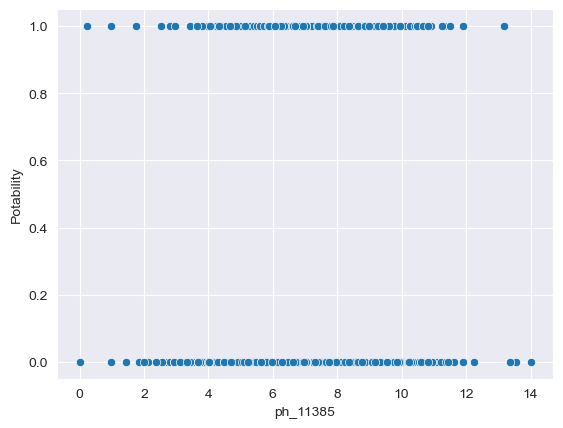

In [87]:
## Plot pH vs Potability
sns.scatterplot(x="ph_11385", y="Potability", data=dataset)

<Axes: xlabel='Sulfate_11385', ylabel='Potability'>

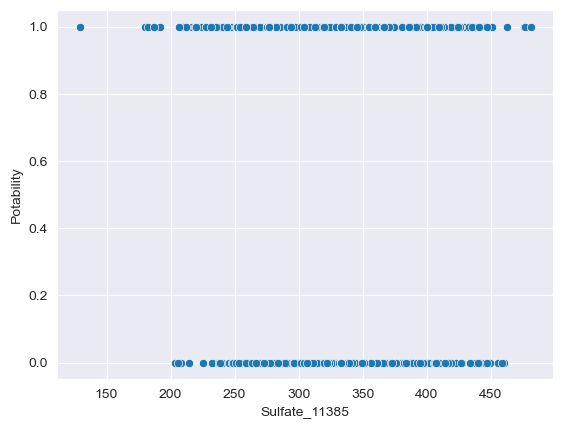

In [88]:
## Plot Sulfate vs Potability
sns.scatterplot(x="Sulfate_11385", y="Potability", data=dataset)

<Axes: xlabel='Trihalomethanes_11385', ylabel='Potability'>

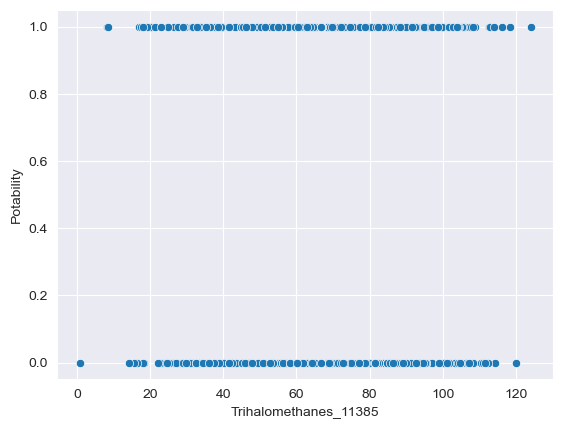

In [89]:
## Plot Trihalomethanes vs Potability
sns.scatterplot(x="Trihalomethanes_11385", y="Potability", data=dataset)

<Axes: xlabel='Potability', ylabel='count'>

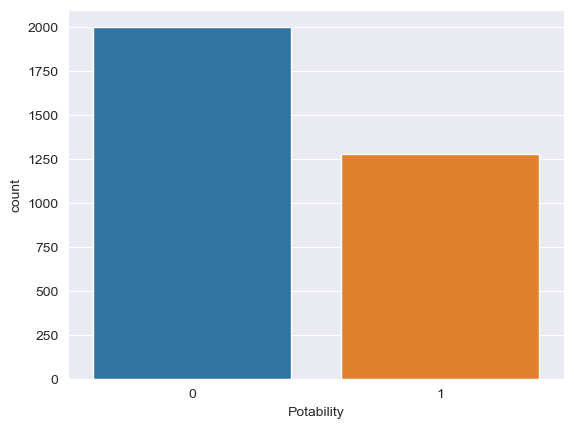

In [90]:
## Plot Potability
sns.countplot(x="Potability", data=dataset)

<Axes: xlabel='Conductivity', ylabel='Count'>

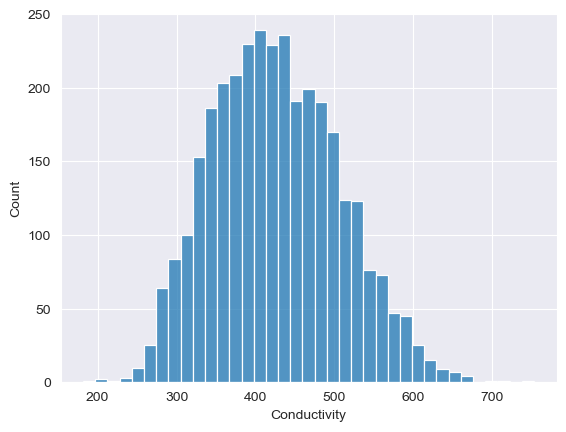

In [91]:
## Plot Conductivity
sns.histplot(x="Conductivity", data=dataset)

<Axes: xlabel='Hardness', ylabel='Count'>

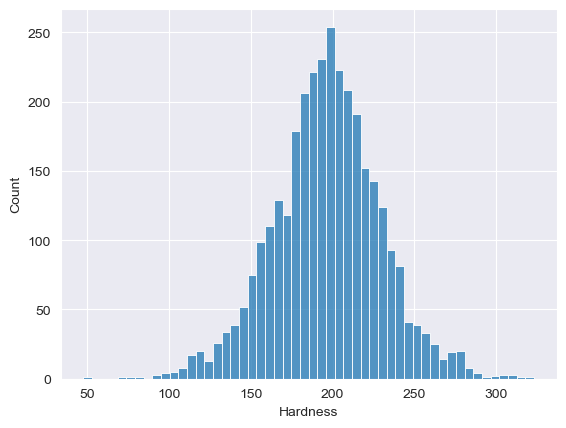

In [92]:
## Plot Hardness
sns.histplot(x="Hardness", data=dataset)

<Axes: xlabel='Solids', ylabel='Count'>

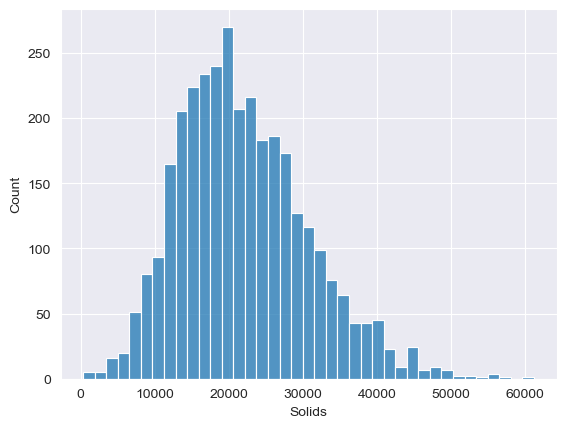

In [93]:
## Plot Solids
sns.histplot(x="Solids", data=dataset)

<Axes: xlabel='Potability', ylabel='Conductivity'>

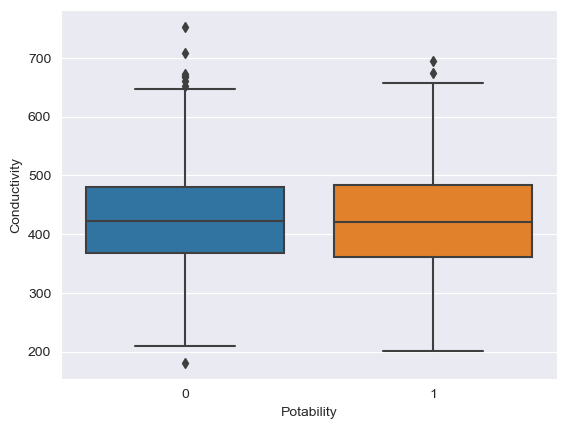

In [94]:
## Plot Potability vs Conductivity
sns.boxplot(x="Potability", y="Conductivity", data=dataset)

In [95]:
## Q1: 1. Apa saja feature yang perlu dilengkapi dari dataset water potability? Bagaimana metode melengkapi feature yang kurang lengkap?
# Jawaban: Feature yang perlu dilengkapi dari dataset water potability adalah feature yang memiliki missing value, yaitu ph, Sulfate, dan Trihalomethanes. Metode yang digunakan untuk melengkapi feature yang kurang lengkap adalah dengan mengisi missing value tersebut dengan nilai median dari feature tersebut.

In [96]:
## Q2: Apa saja informasi yang diperoleh dari proses exploratory data analysis? Deskripsikan hasil eksplorasi dari 3 feature yang dipilih!
# Jawaban: Informasi yang diperoleh dari proses exploratory data analysis adalah:
# 1. Feature yang memiliki missing value adalah ph, Sulfate, dan Trihalomethanes.
# 2. Feature yang memiliki outliers adalah ph, Sulfate, Trihalomethanes, Conductivity, Hardness, dan Solids.
# 3. Feature yang memiliki korelasi positif dengan potability adalah ph, Sulfate, dan Trihalomethanes.
# 4. Feature yang memiliki korelasi negatif dengan potability adalah Conductivity, Hardness, dan Solids.
# 5. Feature yang memiliki korelasi paling kuat dengan potability adalah ph.
# 6. Feature yang memiliki korelasi paling lemah dengan potability adalah Solids.
# 7. Terdapat dua jenis potabilitas air yaitu potable dan not potable, dimana sebagian besar air yang diuji tergolong potable.
#   Tiga feature yang dipilih untuk dijelaskan hasil eksplorasi data analysis adalah:
# - pH: Distribusi pH air cukup simetris dan mengikuti pola normal distribution. Terlihat dari plot scatter bahwa tidak ada korelasi yang kuat antara pH dan potabilitas air.
# - Sulfat: Distribusi sulfat air memiliki beberapa outlier, namun secara umum mengikuti pola normal distribution. Dari plot scatter dapat dilihat bahwa ada kecenderungan air dengan kadar sulfat yang rendah memiliki potabilitas yang lebih tinggi.
# - Trihalomethanes: Distribusi Trihalomethanes air memiliki beberapa outlier, namun secara umum mengikuti pola normal distribution. Dari plot scatter dapat dilihat bahwa ada kecenderungan air dengan kadar Trihalomethanes yang tinggi memiliki potabilitas yang lebih rendah.

In [97]:
## It's the end of the code, thank you for reading!
# Author: Benidiktus Violaz Morello Anjolie